In [3]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

In [4]:
import numpy as np
import tensorflow as tf                            # tensorflow 기본 import
from tensorflow.keras.models import Sequential     # model box 구성
from tensorflow.keras.layers import Flatten, Dense # model 안의 input layer와 output layer를 구성
from tensorflow.keras.optimizers import SGD        # 알고리즘 담당
from sklearn.model_selection import train_test_split # train Data,Test Data 분리
from sklearn.preprocessing import MinMaxScaler     # 데이터 정규화
# 컴퓨터는 큰 숫를 작은 수로
# 변경 0~1 사이 실수 값으로 변경

In [5]:
#age - 나이
#sex - (1 = 남성; 0 = 여성)
#cp - 가슴 통증 유형(0, 1, 2, 3, 4)
#trestbps - 안정 혈압(병원 입원시 mm Hg)
#chol - 혈청 콜레스테롤(mg/dl)
#fbs - (공복 혈당 > 120 mg/dl)(1 = true; 0 = false)
#restecg - 안정 심전도 결과(0, 1, 2)
#thalach - 최대 심박동수
#exang - 협심증 유발 운동(1 = yes; 0 = no)
#oldpeak - 비교적 안정되기까지 운동으로 유발되는 ST depression
#slope - 최대 운동 ST segment의 기울기
#ca - 형광 투시된 주요 혈관의 수(0-3)
#thal - (3 = 보통; 6 = 해결된 결함; 7 = 해결가능한 결함)
#target - 심장병 진단(1 = true; 0 = false)

In [6]:
import pandas as pd
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
cols = df.keys()
cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

TypeError: Axis._set_ticklabels() takes 2 positional arguments but 3 were given

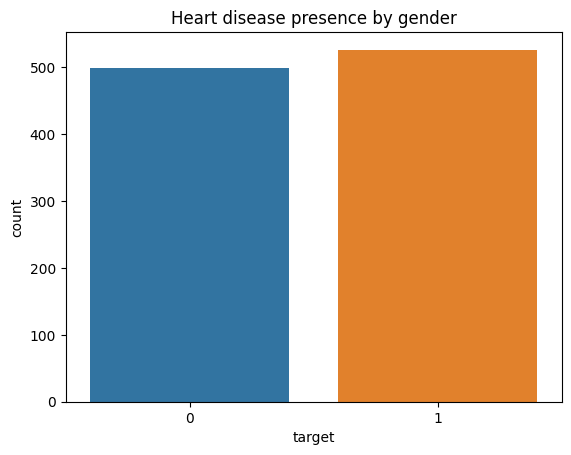

In [31]:
f = sns.countplot(x='target',data=df)
f.set_title("Heart disease presence by gender")
f.set_xticklabels(['No Heart disease'],['Heart disease'])
plt.xlabel("")

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'sex'),
 Text(2.5, 0, 'cp'),
 Text(3.5, 0, 'trestbps'),
 Text(4.5, 0, 'chol'),
 Text(5.5, 0, 'fbs'),
 Text(6.5, 0, 'restecg'),
 Text(7.5, 0, 'thalach'),
 Text(8.5, 0, 'exang'),
 Text(9.5, 0, 'oldpeak'),
 Text(10.5, 0, 'slope'),
 Text(11.5, 0, 'ca'),
 Text(12.5, 0, 'thal'),
 Text(13.5, 0, 'target')]

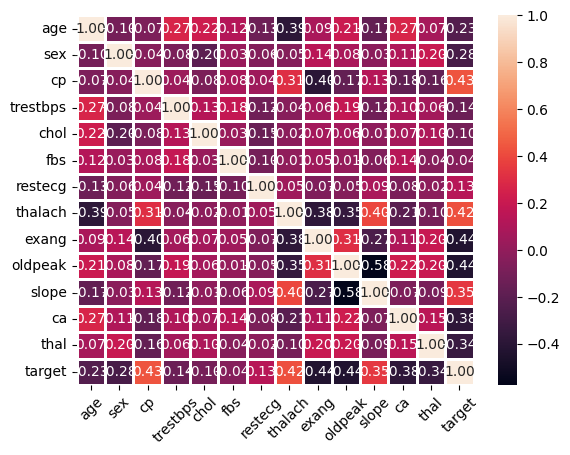

In [12]:
heat_map = sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', linewidth=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45)

In [13]:
x_data = df.drop('target', axis=1, inplace=False)
y_date = df['target']


In [14]:
x_data.shape

(1025, 13)

In [15]:
x_data.shape

(1025, 13)

In [16]:
scaler = MinMaxScaler()
scaler.fit(x_data)
norm_x_data = scaler.transform(x_data)

In [17]:
norm_x_data.shape

(1025, 13)

In [18]:
from sklearn.utils import shuffle
norm_x_data = shuffle(norm_x_data)

In [19]:
norm_x_data

array([[0.85416667, 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       [0.5       , 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.35416667, 1.        , 0.33333333, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.45833333, 0.        , 0.        , ..., 0.5       , 0.        ,
        1.        ],
       [0.52083333, 1.        , 0.33333333, ..., 1.        , 0.25      ,
        1.        ],
       [0.64583333, 0.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ]])

In [20]:
model = Sequential()

In [21]:
model.add(Flatten(input_shape=(13,)))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [22]:
model.compile(optimizer=SGD(learning_rate=0.001),
             loss="binary_crossentropy",
             metrics=['accuracy']
             )

In [23]:
hist = model.fit(norm_x_data,y_date,
                 epochs=100,
                 verbose=1,
                 use_multiprocessing=True,
                 validation_split=0.2
                )

Epoch 1/100
26/26 [==============================] - 1s 9ms/step - loss: 0.6929 - accuracy: 0.5073 - val_loss: 0.6970 - val_accuracy: 0.4976
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5085 - val_loss: 0.6971 - val_accuracy: 0.4976
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5098 - val_loss: 0.6971 - val_accuracy: 0.5024
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5110 - val_loss: 0.6971 - val_accuracy: 0.5024
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5122 - val_loss: 0.6972 - val_accuracy: 0.4976
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5122 - val_loss: 0.6972 - val_accuracy: 0.5024
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5134 - val_loss: 0.6972 - val_accuracy: 0.5073
Epoch 8/100
2

In [24]:
print(model.evaluate(norm_x_data, y_date))

33/33 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5278
[0.6923166513442993, 0.5278048515319824]


In [25]:
import matplotlib.pyplot as plt

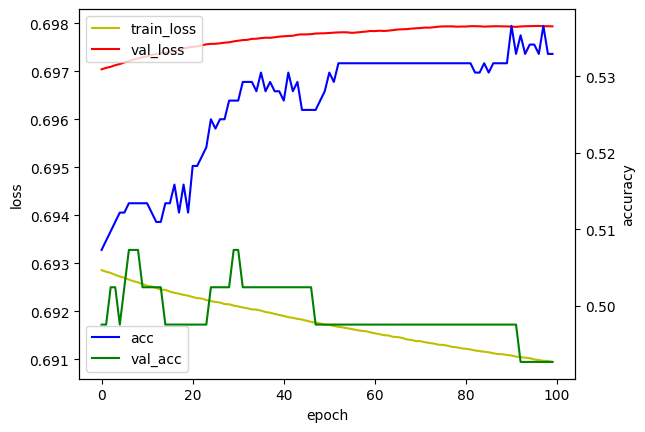

In [29]:
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")